In [78]:
import pandas as pd
import geopandas as gpd
import rasterio
import rasterio.features
import rasterio.warp
from rasterio.plot import show
#Importing the Nominatim geocoder class 
#from geopy.geocoders import Nominatim
from shapely.geometry import point, Polygon
import rioxarray
from pyproj import CRS
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import requests
from osgeo import gdal
from osgeo import ogr
import fiona
%matplotlib inline
import plotly.graph_objects as go

## Download zip files from the following websites:

https://www.geopunt.be/download?container=dhm-vlaanderen-ii-dsm-raster-1m&title=Digitaal%20Hoogtemodel%20Vlaanderen%20II,%20DSM,%20raster,%201m
and 
https://www.geopunt.be/download?container=dhm-vlaanderen-ii-dtm-raster-1m&title=Digitaal%20Hoogtemodel%20Vlaanderen%20II,%20DTM,%20raster,%201m

# Open geotiff files
## DTM - Digital Terrain Model file

In [2]:
terrain = rioxarray.open_rasterio("C:/Users/kasia/pyproj/3D_houses/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif", masked = True)
terrain

<xarray.DataArray (band: 1, y: 9000, x: 17000)>
[153000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 1.45e+05 1.45e+05 1.45e+05 ... 1.62e+05 1.62e+05
  * y            (y) float64 2.47e+05 2.47e+05 2.47e+05 ... 2.38e+05 2.38e+05
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  33.270000457764
    STATISTICS_MEAN:     12.715703254367
    STATISTICS_MINIMUM:  3.1400001049042
    STATISTICS_STDDEV:   3.1190120842843
    scale_factor:        1.0
    add_offset:          0.0

In [3]:
#print(terrain.rio.crs) # Coordinate Reference System
#print(terrain.rio.nodata)
#print(terrain.rio.bounds())
#print(terrain.rio.width)
#print(terrain.rio.height)

In [4]:
#terrain.values

In [5]:
#type(terrain)

In [6]:
#print(terrain.rio.crs) # database of CRS information, each has a specific number

In [7]:
#print(terrain.rio.crs.to_epsg())

In [8]:
#epsg = terrain.rio.crs.to_epsg()
#crs = CRS(epsg)
#crs

# Axis Info: the CRS shows a Cartesian system with two axis, an easting and northing, in meter units.
# Area of Use: the projection is used for a particular range of longitudes 
# Coordinate Operation: the operation to project the coordinates (if it is projected) on to a cartesian (x, y) plane.
# Datum: Details about the datum, or the reference point for coordinates.

In [9]:
#crs.area_of_use

In [10]:
#crs.axis_info

In [11]:
#terrain.rio.crs.linear_units

In [12]:
#print(terrain.min())
#print(terrain.max())
#print(terrain.mean())
#print(terrain.std())

In [13]:
#print(terrain.quantile([0.25, 0.75]))

In [14]:
#terrain.shape

In [15]:
#terrain_ra = rasterio.open('C:/Users/kasia/pyproj/3D_houses/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif')
#terrain_ra

In [16]:
#terrain_ra.count

In [17]:
#terrain_ra.shape

In [18]:
#terrain_ra.width

In [19]:
#terrain_ra.height

In [20]:
#terrain_ra.bounds

In [21]:
#terrain_ra.crs.wkt

In [22]:
#terrain_ra_array = terrain_ra.read(1)
#terrain_ra_array

In [23]:
#show(terrain_ra)

In [24]:
#show(terrain_ra.read(1))

In [25]:
#terrain_slice = terrain_ra_array[8000:8010, 10010:10020]
#terrain_slice

In [26]:
# data for plotting
#nx = terrain_slice.shape[1]
#ny = terrain_slice.shape[0]
#x = range(nx)
#y = range(ny)

In [27]:
# initialize figure and axes3D objects
#hf = plt.figure(figsize = (20,20))
#ha = hf.add_subplot(111, projection='3d')

# plotting the 3D data
#X, Y = np.meshgrid(x,y)
#ha.plot_surface(X, Y, terrain_slice)
#plt.show()

## DSM - Digital Surface Model file

In [28]:
surface = rioxarray.open_rasterio("C:/Users/kasia/pyproj/3D_houses/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif", masked = True)
surface

<xarray.DataArray (band: 1, y: 9000, x: 17000)>
[153000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 1.45e+05 1.45e+05 1.45e+05 ... 1.62e+05 1.62e+05
  * y            (y) float64 2.47e+05 2.47e+05 2.47e+05 ... 2.38e+05 2.38e+05
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  98.559997558594
    STATISTICS_MEAN:     15.598165931673
    STATISTICS_MINIMUM:  -3.25
    STATISTICS_STDDEV:   7.0595914207194
    scale_factor:        1.0
    add_offset:          0.0

In [29]:
surface.shape

(1, 9000, 17000)

In [30]:
surface_ra = rasterio.open('C:/Users/kasia/pyproj/3D_houses/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif')

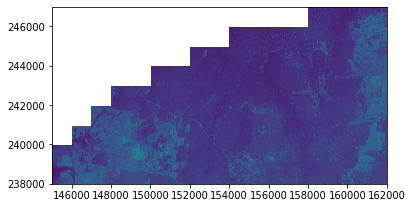

<AxesSubplot:>

In [31]:
show(surface_ra)

In [32]:
surface_ra_array = surface_ra.read(1)
surface_ra_array

array([[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,  1.279e+01,
         1.280e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,  1.281e+01,
         1.284e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,  1.283e+01,
         1.288e+01],
       ...,
       [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,  1.693e+01,
         1.690e+01],
       [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,  1.691e+01,
         1.695e+01],
       [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,  1.688e+01,
         1.691e+01]], dtype=float32)

In [33]:
surface_slice = surface_ra_array[8000:8010, 10010:10020]

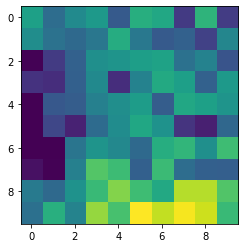

<AxesSubplot:>

In [34]:
show(surface_slice)

In [35]:
# data for plotting
nx = surface_slice.shape[1]
ny = surface_slice.shape[0]
x = range(nx)
y = range(ny)

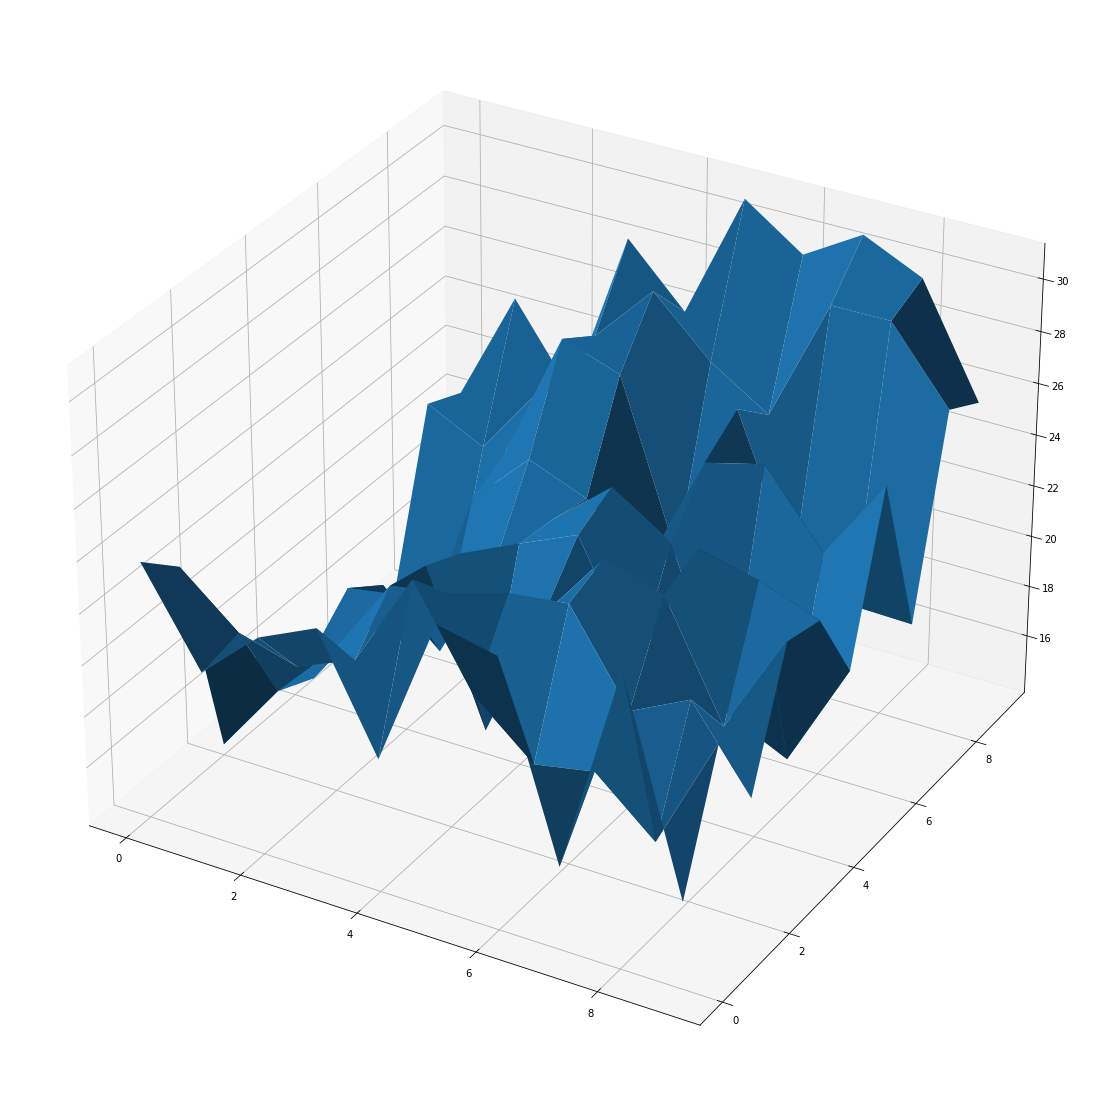

In [36]:
# initialize figure and axes3D objects
hf = plt.figure(figsize = (20,20))
ha = hf.add_subplot(111, projection='3d')

# plotting the 3D data
X, Y = np.meshgrid(x,y)
ha.plot_surface(X, Y, surface_slice)
plt.show()

In [37]:
terrain_matched = terrain.rio.reproject_match(surface)

In [38]:
canopy = surface - terrain_matched
canopy.compute()

<xarray.DataArray (band: 1, y: 9000, x: 17000)>
array([[[       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.02000046],
        [0.        , 0.        , 0.        , ..., 0.01000023,
         0.        , 0.01000023]]], dtype=float32)
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 1.45e+05 1.45e+05 1.45e+05 ... 1.62e+05 1.62e+05
  * y            (y) float64 2.47e+05 2.47e+05 2.47e+05 ... 2.38e+05 2.38e+05
    spatial_ref  int32 0

In [39]:
print(canopy.min())
print(canopy.max())
print(canopy.mean())
print(canopy.std())

<xarray.DataArray ()>
array(-13.79, dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(91.4532, dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(2.8824549, dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(5.4895062, dtype=float32)
Coordinates:
    spatial_ref  int32 0


Calculating CHM with rasterio

In [41]:
#dtm = terrain_ra.read(1)

## Open .shp file

In [42]:
path = 'C:/Users/kasia/pyproj/3D_houses/DHMVIIDTMRAS1m_k01/DHMVII_vdc_k01/DHMVII_vdc_k01.shp'

In [43]:
test = gpd.read_file(path)

In [44]:
test

,Id,OpnDatum1,OpnDatum2,geometry
0,0,2013-02-20,None,"MULTIPOLYGON Z (((162079.010 238604.770 0.000,..."
1,0,2013-04-01,None,"POLYGON Z ((148803.300 243432.780 0.000, 14882..."
2,0,2013-02-20,2013-04-01,"MULTIPOLYGON Z (((156554.470 243736.800 0.000,..."


In [45]:
test['geometry']

0    MULTIPOLYGON Z (((162079.010 238604.770 0.000,...
1    POLYGON Z ((148803.300 243432.780 0.000, 14882...
2    MULTIPOLYGON Z (((156554.470 243736.800 0.000,...
Name: geometry, dtype: geometry

<AxesSubplot:>

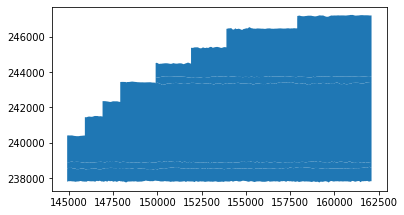

In [46]:
test.plot()

## Geocode the provided address:

In [47]:
address = 'Sint-Pietersvliet 7, Antwerpen'

In [48]:
location = gpd.tools.geocode(address)

In [49]:
location

,geometry,address
0,POINT (4.40106 51.22535),"Radio 2 Antwerpen, 7, Sint-Pietersvliet, 2000,..."


## Geocode the provided address via https://loc.geopunt.be/ API 

In [ ]:
street = 'Rodelijvekensstraat'
number = '82'
postcode = '9000'
city = 'Gent'

#Rodelijvekensstraat 829000 Gent


In [ ]:
url = f'https://loc.geopunt.be/v4/Location?q={street}%20{number},%20{postcode}%20{city}'
data = response = requests.get(url).json()

In [ ]:
data

In [ ]:
coordinates = data["LocationResult"][0]["Location"]

In [ ]:
X_Lambert72 = coordinates["X_Lambert72"]
Y_Lambert72 = coordinates["Y_Lambert72"]

In [ ]:
print(X_Lambert72)
print(Y_Lambert72)

In [ ]:
url_pol = 'https://api.basisregisters.vlaanderen.be/v1/adresmatch'

In [ ]:
data_pol = response = requests.get(url_pol).json()

In [ ]:
data_pol

In [50]:
address = input('Provide a valid address in Flanders: ')
#Heikantstraat 124, 2910 Essen
#Epicealaan 28, 2910 Essen
#Moerkantsebaan 34, 2910 Essen
#Maststraat 2, 2910 Essen

Provide a valid address in Flanders: Epicealaan 28, 2910 Essen


In [51]:
def get_coordinates(address: str):
    req = requests.get(f"https://loc.geopunt.be/v4/Location?q={address}").json()
    info = {'address' : address, 
                'x_value' : req['LocationResult'][0]['Location']['X_Lambert72'],
                'y_value' : req['LocationResult'][0]['Location']['Y_Lambert72'],
                'street' : req['LocationResult'][0]['Thoroughfarename'],
                'house_number' : req['LocationResult'][0]['Housenumber'], 
                'postcode': req['LocationResult'][0]['Zipcode'], 
                'municipality' : req['LocationResult'][0]['Municipality']}
    
    detail = requests.get("https://api.basisregisters.vlaanderen.be/v1/adresmatch", 
                          params={"postcode": info['postcode'], 
                                  "straatnaam": info['street'],
                                  "huisnummer": info['house_number']}).json()
    building = requests.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
    build = requests.get(building['gebouw']['detail']).json()
    info['polygon'] = [build['geometriePolygoon']['polygon']]
    return info['polygon'][0]['coordinates'][0] 

In [52]:
from shapely.geometry import Polygon

In [53]:
polygon = get_coordinates(address)
polygon

[[155555.0582550913, 238553.23415149376],
 [155552.70523109287, 238552.58135149628],
 [155551.08974309266, 238557.83306349814],
 [155541.3664790839, 238554.839143496],
 [155545.96743908525, 238539.7295114845],
 [155554.66119909286, 238542.18032748625],
 [155555.14708708972, 238540.51607148722],
 [155558.52071909606, 238541.56477548555],
 [155555.0582550913, 238553.23415149376]]

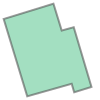

In [54]:
polygon_shapely = Polygon(polygon)
polygon_shapely

In [55]:
type(polygon_shapely)

shapely.geometry.polygon.Polygon

In [56]:
print(polygon_shapely)

POLYGON ((155555.0582550913 238553.2341514938, 155552.7052310929 238552.5813514963, 155551.0897430927 238557.8330634981, 155541.3664790839 238554.839143496, 155545.9674390852 238539.7295114845, 155554.6611990929 238542.1803274862, 155555.1470870897 238540.5160714872, 155558.5207190961 238541.5647754855, 155555.0582550913 238553.2341514938))


In [57]:
import shapefile

w = shapefile.Writer('shapefiles/test/polygon2')
w.field('name', 'C')

w.poly([polygon])
w.record('polygon1')

w.close()
# To read back the files you could call the "StringIO.getvalue()" method later.

In [58]:
# read test file
path = 'C:/Users/kasia/pyproj/3D_houses/shapefiles/test/polygon2.shp'
test_1 = gpd.read_file(path)

<AxesSubplot:>

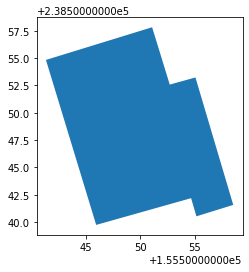

In [59]:
test_1.plot()

# Clip geotiff raster with a shapely polygon

In [60]:
polygon_path = 'C:/Users/kasia/pyproj/3D_houses/shapefiles/test/polygon2.shp'

In [61]:
#DSM clip
OutTile = gdal.Warp("C:/Users/kasia/pyproj/3D_houses/shapefiles/test/DSM_clip2.tif", 
                    "C:/Users/kasia/pyproj/3D_houses/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif", 
                    cutlineDSName=polygon_path,
                    cropToCutline=True,
                    dstNodata = 0)

OutTile = None 

In [62]:
dsm_clip = rioxarray.open_rasterio("C:/Users/kasia/pyproj/3D_houses/shapefiles/test/DSM_clip2.tif", masked = True)

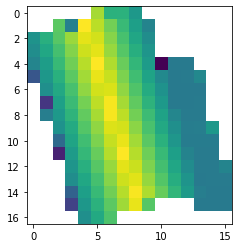

<AxesSubplot:>

In [63]:
show(dsm_clip)

In [64]:
#DTM clip
OutTile = gdal.Warp("C:/Users/kasia/pyproj/3D_houses/shapefiles/test/DTM_clip2.tif", 
                    "C:/Users/kasia/pyproj/3D_houses/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif", 
                    cutlineDSName=polygon_path,
                    cropToCutline=True,
                    dstNodata = 0)

OutTile = None 

In [65]:
dtm_clip = rioxarray.open_rasterio("C:/Users/kasia/pyproj/3D_houses/shapefiles/test/DTM_clip2.tif", masked = True)

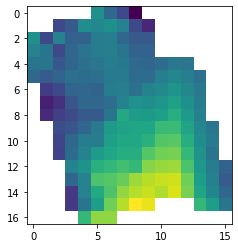

<AxesSubplot:>

In [66]:
show(dtm_clip)

In [67]:
chm_clip = dsm_clip-dtm_clip

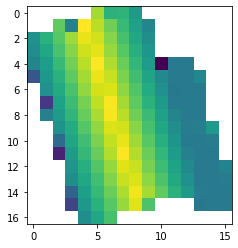

<AxesSubplot:>

In [68]:
show(chm_clip)

In [69]:
chm_clip = chm_clip.fillna(0)

In [70]:
chm_clip_padded = np.pad(chm_clip, pad_width=1)

In [71]:
chm_clip_padded

array([[[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]],

       [[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 2.83     , 2.8500004,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
   

In [72]:
chm_clip_padded.shape

(3, 19, 18)

In [95]:
z_data = chm_clip_padded[1]
z = z_data.values
sh_0, sh_1 = z.shape
x, y = np.arange(18),np.arange(19)
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=20, height=20,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

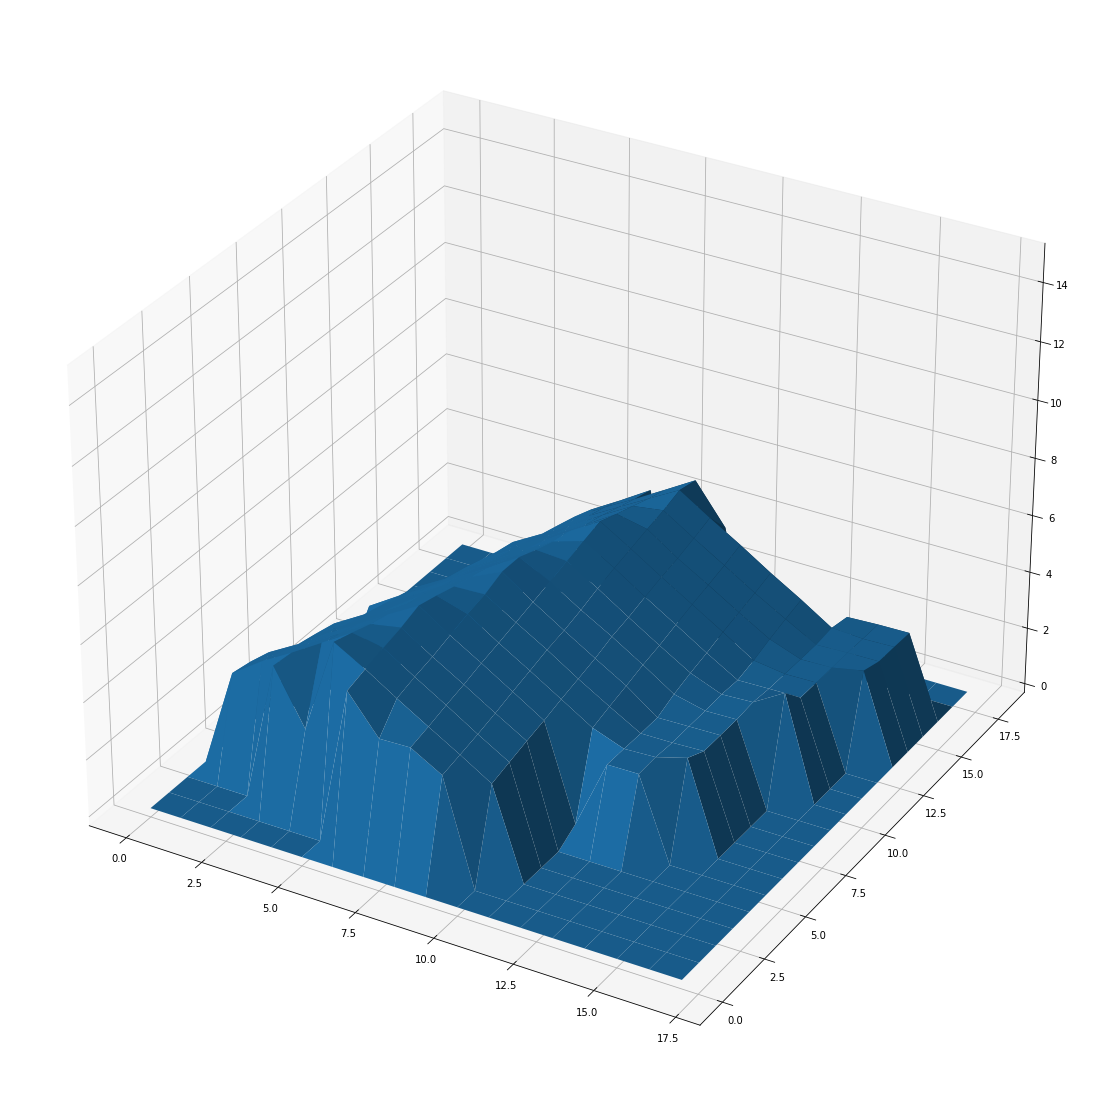

In [77]:
# initialize figure and axes3D objects
hf = plt.figure(figsize = (20,20))
ha = hf.add_subplot(111, projection='3d')

# plotting the 3D data
X, Y = np.meshgrid(np.arange(18), np.arange(19))
ha.plot_surface(X, Y, chm_clip_padded[1])
ha.set_zlim(0,15)
plt.show()